In [1]:
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from IPython.display import Image
from langgraph.checkpoint.postgres import PostgresSaver
import json

import os
from dotenv import load_dotenv

from agent import Agent, tools

load_dotenv()

True

In [2]:
connection_kwargs = {
    "autocommit": True,
    "prepare_threshold": 0,
}

from psycopg_pool import ConnectionPool
from langgraph.prebuilt import create_react_agent

model = ChatOpenAI(model="gpt-4o-mini", openai_api_key=os.getenv('OPENAI_API_KEY'))

pool = ConnectionPool(
    # Example configuration
    conninfo=os.getenv('AGENT_STATE_DB_URI'),
    max_size=20,
    kwargs=connection_kwargs,
)
checkpointer = PostgresSaver(pool)

abot = Agent(model, tools, checkpointer=checkpointer)
config = {"configurable": {"thread_id": "1"}}
res = abot.graph.invoke({"messages": [("human", "where is it?")]}, config)

{'messages': [['human', "what's the weather in sf"], AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_B6ruj9VfeDSP1lbqbyuBmZyh', 'function': {'arguments': '{"query":"current weather in San Francisco"}', 'name': 'expert'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 451, 'total_tokens': 469, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0ba0d124f1', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-29237328-e56e-45db-97bb-d688c5796935-0', tool_calls=[{'name': 'expert', 'args': {'query': 'current weather in San Francisco'}, 'id': 'call_B6ruj9VfeDSP1lbqbyuBmZyh', 'type': 'tool_call'}], usage_metadata={'input_tokens': 451, 'output_tokens': 18, 'total_tokens': 469, 'input_token_details': {'cache_read': 0}, 'output_token_details'

In [3]:
res

{'messages': [['human', "what's the weather in sf"],
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_B6ruj9VfeDSP1lbqbyuBmZyh', 'function': {'arguments': '{"query":"current weather in San Francisco"}', 'name': 'expert'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 451, 'total_tokens': 469, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0ba0d124f1', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-29237328-e56e-45db-97bb-d688c5796935-0', tool_calls=[{'name': 'expert', 'args': {'query': 'current weather in San Francisco'}, 'id': 'call_B6ruj9VfeDSP1lbqbyuBmZyh', 'type': 'tool_call'}], usage_metadata={'input_tokens': 451, 'output_tokens': 18, 'total_tokens': 469, 'input_token_details': {'cache_read': 0}, 'output_token_detail

In [7]:
pool.close()

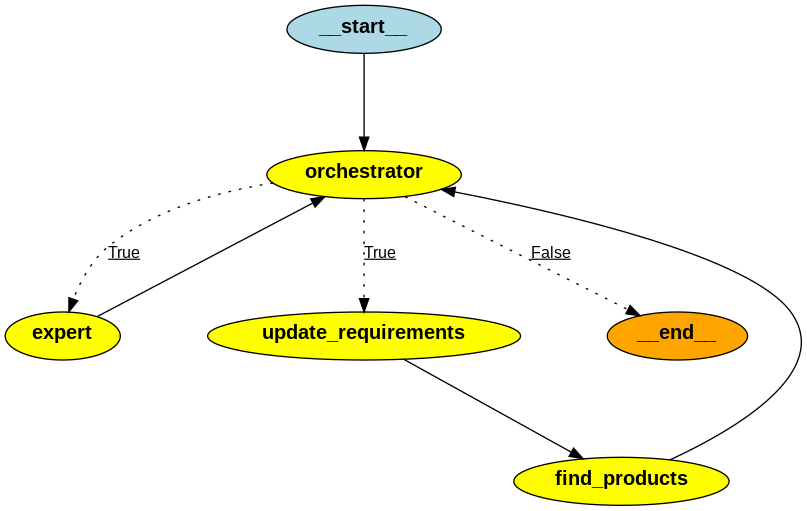

In [4]:
Image(abot.graph.get_graph().draw_png())

In [6]:
messages = [HumanMessage(content="What is the weather in sf?")]
thread = {"configurable": {"thread_id": "1"}}

result = abot.graph.invoke({"messages": messages}, thread)

{'messages': [HumanMessage(content='What is the weather in sf?', additional_kwargs={}, response_metadata={})], 'requirements': Requirements(requirements=[], query='', keywords=[]), 'candidates': CandidateList(candidates=[])}
Expert called!
Calling: {'name': 'expert', 'args': {'query': 'current weather in San Francisco'}, 'id': 'call_zgDLaXD7TgjlhdyDSVq7P0Ek', 'type': 'tool_call'}
Back to the model!
{'messages': [HumanMessage(content='What is the weather in sf?', additional_kwargs={}, response_metadata={}), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_zgDLaXD7TgjlhdyDSVq7P0Ek', 'function': {'arguments': '{"query":"current weather in San Francisco"}', 'name': 'expert'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 452, 'total_tokens': 470, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_nam

In [7]:
result

{'messages': [HumanMessage(content='What is the weather in sf?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_zgDLaXD7TgjlhdyDSVq7P0Ek', 'function': {'arguments': '{"query":"current weather in San Francisco"}', 'name': 'expert'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 452, 'total_tokens': 470, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0ba0d124f1', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-0d9312cd-6f05-46b1-9d1d-81d22e921651-0', tool_calls=[{'name': 'expert', 'args': {'query': 'current weather in San Francisco'}, 'id': 'call_zgDLaXD7TgjlhdyDSVq7P0Ek', 'type': 'tool_call'}], usage_metadata={'input_tokens': 452, 'output_tokens': 18, 'total_tokens': 470, 'inpu

In [8]:
messages = [HumanMessage(content="Hi")]
thread = {"configurable": {"thread_id": "45"}}
for event in abot.graph.stream({"messages": messages}, thread):
    for v in event.values():
        print(v)

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={})], 'requirements': Requirements(requirements=[], query='', keywords=[]), 'candidates': CandidateList(candidates=[])}
{'messages': [AIMessage(content='Hi there! How can I assist you today? Are you looking for a specific software or AI product? If you could share a bit about what you need, I can help you find the right solution!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 446, 'total_tokens': 488, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0ba0d124f1', 'finish_reason': 'stop', 'logprobs': None}, id='run-538f44a9-537c-4d6f-808d-c1ab126a73b9-0', usage_metadata={'input_tokens': 446, 'output_tokens': 42, 'total_tokens': 488, 'input_token_details': {'cache_read': 0}, 'outpu

In [4]:
idx = 76
messages = [HumanMessage(content="I am looking for a website builder")]
thread = {"configurable": {"thread_id": f"{idx}"}}
for event in abot.graph.stream({"messages": messages}, thread):
    for v in event.values():
        print(v)

{'messages': [HumanMessage(content='I am looking for a website builder', additional_kwargs={}, response_metadata={})], 'requirements': Requirements(requirements=[], query='', keywords=[]), 'candidates': CandidateList(candidates=[])}
{'messages': [AIMessage(content="It sounds like you're interested in a website builder! To help narrow down the options, could you share more about what you're looking for? For example, do you need features like e-commerce, templates, or SEO tools? Knowing more about your specific requirements will help me find the right products for you.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 61, 'prompt_tokens': 508, 'total_tokens': 569, 'completion_tokens_details': {'audio_tokens': 0, 'reasoning_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0ba0d124f1',

In [5]:
messages = [HumanMessage(content="find_products for I am looking for where I can getstarted by drag-and-drop but also enables me to edit code when required, its a chat interface website and with blogs, SEO is helpful, something free to use to get started")]
thread = {"configurable": {"thread_id": f"{idx}"}} 
res = abot.graph.invoke({"messages": messages}, thread)

{'messages': [HumanMessage(content='I am looking for a website builder', additional_kwargs={}, response_metadata={}), AIMessage(content="It sounds like you're interested in a website builder! To help narrow down the options, could you share more about what you're looking for? For example, do you need features like e-commerce, templates, or SEO tools? Knowing more about your specific requirements will help me find the right products for you.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 61, 'prompt_tokens': 508, 'total_tokens': 569, 'completion_tokens_details': {'audio_tokens': 0, 'reasoning_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0ba0d124f1', 'finish_reason': 'stop', 'logprobs': None}, id='run-903b5d0b-bbc9-4d98-b282-cdf4b2dc29bb-0', usage_metadata={'input_tokens': 508

KeyboardInterrupt: 

In [6]:
res

{'messages': [HumanMessage(content='I am looking for a website builder', additional_kwargs={}, response_metadata={}),
  AIMessage(content="It sounds like you're interested in a website builder! Can you tell me more about your specific needs? For example, are you looking for a builder that's easy to use, has e-commerce capabilities, or offers specific design features?", additional_kwargs={}, response_metadata={}),
  HumanMessage(content='find_products for I am looking for where I can getstarted by drag-and-drop but also enables me to edit code when required, its a chat interface website and with blogs, SEO is helpful, something free to use to get started', additional_kwargs={}, response_metadata={}),
  AIMessage(content="I couldn't find any specific products that perfectly match your requirements right now. However, it seems like you're looking for a flexible website builder that allows for drag-and-drop functionality, coding options, chat interface capabilities, blogs, and SEO features

In [ ]:
{'requirements': Requirements(requirements=['Drag-and-drop functionality', 'Code editing capabilities', 'Chat interface support', 'Blog integration', 'SEO tools', 'Free to use'], query='free website builder with drag-and-drop, code editing, chat interface, blogs, and SEO tools', keywords=['website builder', 'drag-and-drop', 'SEO']),
 'candidates': CandidateList(candidates=[Candidate(title='Wix', product_URL='https://www.wix.com/', overview='Wix is a popular drag-and-drop website builder that offers a wide range of features. It includes over 900 customizable templates, an AI-powered builder that can create a site based on user input, and a traditional drag-and-drop editor with no coding requirements. Wix supports blogging, eCommerce, and various other functionalities like forms, chat, and appointment scheduling. It also provides advanced SEO tools, including the ability to adjust page titles, meta descriptions, and add alt tags. The platform offers a free plan with limitations on bandwidth, ads, and storage, but it is highly feature-rich compared to other free website builders. Wix also has an app store with over 500 widgets and plugins and includes small business and marketing tools like CRM, social posts, and email marketing.', raw_content="Website Builder - Create a Free Website Today | Wix.com Product CREATION Website design Create your site with intuitive")])
'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Hi there! How can I assist you today? Are you looking for a specific software or AI product? If you could share a bit about what you need, I can help you find the right solution!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 446, 'total_tokens': 488, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0ba0d124f1', 'finish_reason': 'stop', 'logprobs': None}, id='run-538f44a9-537c-4d6f-808d-c1ab126a73b9-0', usage_metadata={'input_tokens': 446, 'output_tokens': 42, 'total_tokens': 488, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}}),
  HumanMessage(content='I am looking for a website builder', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Great! A website builder is a fantastic tool for creating and managing websites easily. Could you share more about your specific requirements for the website builder? For example:\n\n- What type of website are you looking to build (e.g., personal blog, business site, portfolio, e-commerce)?\n- Do you have any preferences regarding design templates or customization options?\n- Are you looking for any specific features like SEO tools, e-commerce capabilities, or integrations with other services?\n- What is your level of experience with website building (beginner, intermediate, advanced)?\n\nFeel free to add any other details that could help narrow down the options!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 126, 'prompt_tokens': 502, 'total_tokens': 628, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0ba0d124f1', 'finish_reason': 'stop', 'logprobs': None}, id='run-c4b9c5bc-099a-4cc7-87bb-0c16fb7b332c-0', usage_metadata={'input_tokens': 502, 'output_tokens': 126, 'total_tokens': 628, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}}),
  HumanMessage(content='I am looking for where I can getstarted by drag-and-drop but also enables me to edit code when required, its a chat interface website and with blogs, SEO is helpful, something free to use to get started', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_myXN2VHwpaDblqSaFyo8YCID', 'function': {'arguments': '{}', 'name': 'update_requirements'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 678, 'total_tokens': 689, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0ba0d124f1', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-7c004227-5b1c-4afb-8398-4be536b29e2b-0', tool_calls=[{'name': 'update_requirements', 'args': {}, 'id': 'call_myXN2VHwpaDblqSaFyo8YCID', 'type': 'tool_call'}], usage_metadata={'input_tokens': 678, 'output_tokens': 11, 'total_tokens': 689, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}}),
  ToolMessage(content='updated list of requirements', name='update_requirements', tool_call_id='call_myXN2VHwpaDblqSaFyo8YCID'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_mNqGprVjX4LCl12JWpgNQcRG', 'function': {'arguments': '{}', 'name': 'find_products'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 729, 'total_tokens': 739, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0ba0d124f1', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-93a84492-8c29-42f4-ace0-ef106d55bd20-0', tool_calls=[{'name': 'find_products', 'args': {}, 'id': 'call_mNqGprVjX4LCl12JWpgNQcRG', 'type': 'tool_call'}], usage_metadata={'input_tokens': 729, 'output_tokens': 10, 'total_tokens': 739, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}}),
  ToolMessage(content='updated list of products', name='find_products', tool_call_id='call_mNqGprVjX4LCl12JWpgNQcRG'),
  AIMessage(content="I've found several website builders that align with your requirements for a drag-and-drop interface, code editing capabilities, chat interface support, blogging, SEO tools, and a free option to get started. Here’s a summary of the top candidates:\n\n1. **Wix**\n   - **Overview**: A popular drag-and-drop website builder with a variety of customizable templates and an AI-powered builder. It includes advanced SEO tools, blogging capabilities, and supports chat integration.\n   - **Free Plan**: Yes, with limitations.\n   - **Link**: [Wix](https://www.wix.com/)\n\n2. **Webfity**\n   - **Overview**: A free website builder offering drag-and-drop functionality, SEO tools, and blog creation. It provides a range of design templates and allows you to add premium widgets.\n   - **Free Plan**: Yes.\n   - **Link**: [Webfity](https://webfity.com/)\n\n3. **Unicorn Platform**\n   - **Overview**: An AI-powered builder designed for startups, providing drag-and-drop functionality and custom code editing options. It supports blog creation and payment integration.\n   - **Free Plan**: Yes.\n   - **Link**: [Unicorn Platform](https://unicornplatform.com/)\n\n4. **Dorik**\n   - **Overview**: A no-code website builder with a drag-and-drop interface, built-in blogging platform, and SEO tools. It focuses on ease of use with a variety of templates.\n   - **Free Plan**: Yes.\n   - **Link**: [Dorik](https://dorik.com/?ref=katt80)\n\n5. **BootstrapSite**\n   - **Overview**: This builder combines drag-and-drop with the ability to edit code, making it suitable for tech-savvy users. It is focused on clean code generation for better SEO.\n   - **Free Plan**: Yes.\n   - **Link**: [BootstrapSite](https://www.bootstrapsite.com/)\n\n6. **Pineapple Builder**\n   - **Overview**: An AI-driven website builder that supports drag-and-drop editing and allows for custom code editing. It also includes SEO tools and blog capabilities.\n   - **Free Plan**: Yes.\n   - **Link**: [Pineapple Builder](https://www.pineapplebuilder.com/)\n\n7. **1MinuteWeb**\n   - **Overview**: A simple website builder offering pre-designed templates, built-in blog capabilities, and SEO tools. It supports live chat but may have limited code editing functionalities.\n   - **Free Trial**: Yes, for 14 days.\n   - **Link**: [1MinuteWeb](https://www.1minuteweb.com/)\n\nEach of these options has its unique strengths. To help narrow it down further, could you tell me more about:\n\n- What specific features are most important to you? (e.g., the ability to integrate a chat interface, specific blogging capabilities, or SEO features)\n- Any particular design preferences or examples of websites you like?\n- Do you have any other requirements or considerations? \n\nThis information will help us refine the search even more!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 648, 'prompt_tokens': 25800, 'total_tokens': 26448, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0ba0d124f1', 'finish_reason': 'stop', 'logprobs': None}, id='run-be9d7401-ce1f-44b3-98c9-de1423da3914-0', usage_metadata={'input_tokens': 25800, 'output_tokens': 648, 'total_tokens': 26448, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})]}

In [17]:
state = abot.graph.get_state(thread)  # Retrieve the state
json_state = state.values # Convert the state to JSON format
print(json_state)

{'requirements': Requirements(requirements=['Drag-and-drop functionality', 'Ability to edit code', 'Chat interface capabilities', 'Blogging features', 'SEO tools', 'Free to use'], query='drag-and-drop website builder with code editing, chat interface, blogging, SEO, free', keywords=['website builder', 'drag-and-drop', 'free']), 'candidates': CandidateList(candidates=[Candidate(title='Free No Code Website Builder', product_URL='https://www.bootstrapsite.com/', overview="This website offers a free, drag-and-drop website builder that allows you to edit the code, making it ideal for users who want more control over their site's design. While it's still under development and doesn't have features like chat or a blogging platform yet, it promises clean HTML code compatible with Bootstrap and encourages community contributions to expand its functionality. The focus is on empowering developers, allowing them to write custom CSS and create custom classes. This builder prioritizes open-source de

In [21]:
json_state['candidates'].candidates
json_state['requirements'].requirements
json_state['messages']

[HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Hi there! How can I assist you today? What type of product are you looking for? Please share any specific requirements or features you have in mind!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 32, 'prompt_tokens': 446, 'total_tokens': 478, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0ba0d124f1', 'finish_reason': 'stop', 'logprobs': None}, id='run-9d719c28-f637-405c-b211-8c23b8cee566-0', usage_metadata={'input_tokens': 446, 'output_tokens': 32, 'total_tokens': 478, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}}),
 HumanMessage(content='I am looking for a website builder', additional_kwargs={}, response_metadata={}),
 AIMessage(content="Great! A

In [ ]:
cad_list = abot.graph.get_state({"configurable": {"thread_id": "4"}}).values['candidates'].candidates

In [ ]:
for c in cad_list:
    print(c.title)
    print(c.product_URL)
    print(len(c.raw_content.split(' ')))
    print('\n')


The Leader in Website Creation | Create Your Free Website | Wix.com
https://www.wix.com/lp-en/website-builder?utm_source=affiliate&utm_medium=paid_referral&utm_campaign=af_68@fitsmallbusiness.com/&experiment_id=cake_164946583%5E57
1041


SITE123 - By far the easiest<br>free website builder
https://app.site123.com/?aff=12995518&l=en&landingSystem=1
134


Your website, your business, your future｜Wix.com
https://www.wix.com/
2506


Create Your Own Free Website in Minutes | Websitebuilder
https://www.websitebuilder.com/
6


Free Website Builder Software | 10,000+ Free Templates
https://nicepage.com/
2109


Weebly is the easiest way to create a website, store or blog
https://www.weebly.com/
491


Free No Code Website Builder
https://www.bootstrapsite.com/
2065


Free Website Builder. Create Your Own Website by Yourself!
https://www.ucoz.com/
369


Free Website Builder | Create a Free Website | Webfity.com
https://webfity.com/
1162


Cheetah for WordPress
https://cheetahbuilderpro.com/?aid=2

In [ ]:
cad_list = abot.graph.get_state({"configurable": {"thread_id": "4"}}).values['candidates'].candidates

StateSnapshot(values={'requirements': Requirements(requirements=['Drag-and-drop interface', 'Ability to edit code', 'Chat interface support', 'Blog functionality', 'SEO tools', 'Free to use'], query='free website builder with drag-and-drop, code editing, chat, blogs, SEO', keywords=['website builder', 'drag-and-drop', 'code editing', 'chat', 'blogs', 'SEO', 'free']), 'candidates': CandidateList(candidates=[Candidate(title='The Leader in Website Creation | Create Your Free Website | Wix.com', product_URL='https://www.wix.com/lp-en/website-builder?utm_source=affiliate&utm_medium=paid_referral&utm_campaign=af_68@fitsmallbusiness.com/&experiment_id=cake_164946583%5E57', overview="Wix.com offers a free website builder with drag-and-drop functionality, allowing you to create a website without coding knowledge. It includes features like mobile-responsive templates, unlimited customization, blogging capabilities, SEO tools, and integration with Facebook ads and email marketing. While Wix doesn

In [ ]:
messages = [HumanMessage(content="Suggest me one best option out of there and make sure it meets all my requirements")]
thread = {"configurable": {"thread_id": "4"}}
for event in abot.graph.stream({"messages": messages}, thread):
    for v in event.values():
        print(v)

{'requirements': Requirements(requirements=['drag-and-drop interface', 'ability to edit code', 'chat interface', 'blog capabilities', 'SEO tools', 'free to use'], query='', keywords=[]), 'candidates': CandidateList(candidates=[]), 'messages': [HumanMessage(content='I am looking for a website builder', additional_kwargs={}, response_metadata={}), AIMessage(content='Great! Could you tell me a bit more about your specific needs for a website builder? For example, are you looking for something easy to use, or do you need advanced features like e-commerce capabilities, SEO tools, or specific design templates? The more details you can provide, the better I can assist you in finding the right tool.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 69, 'prompt_tokens': 452, 'total_tokens': 521, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name

In [ ]:
messages = [HumanMessage(content="Does it also have the ability to build websites using AI by giving prompts")]
thread = {"configurable": {"thread_id": "4"}}
for event in abot.graph.stream({"messages": messages}, thread):
    for v in event.values():
        print(v)

{'messages': [AIMessage(content="Yes, Wix offers a feature called **Wix ADI (Artificial Design Intelligence)**, which allows you to create a website using AI technology. Here's how it works:\n\n- **AI-Based Creation**: By answering a few simple questions, Wix ADI can design a personalized website for you, complete with custom text and images.\n- **Customization**: After the initial design is created, you can further customize the site using the drag-and-drop builder.\n- **Ease of Use**: This feature is perfect if you want to quickly generate a website design based on your input and then tweak it as needed.\n\nThis AI-driven approach makes it even easier to get started, especially if you have specific design ideas or requirements in mind. Let me know if you have any more questions or need further assistance!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 161, 'prompt_tokens': 1176, 'total_tokens': 1337, 'completion_tokens_details': {'audio

In [ ]:
messages = [HumanMessage(content="Can i give prompts to it in an iterative fashion and can it build me the whole website in that fashion?")]
thread = {"configurable": {"thread_id": "4"}}
for event in abot.graph.stream({"messages": messages}, thread):
    for v in event.values():
        print(v)

{'messages': [AIMessage(content="Wix ADI is designed to simplify the website creation process by asking a series of initial questions to understand your needs and preferences. However, it doesn't work in a fully iterative prompt-based interaction like some advanced AI conversational models. Here's how it typically functions:\n\n1. **Initial Setup**: You provide answers to a set of questions regarding the type of site you want, the features you need, and your design preferences.\n2. **Template Generation**: Based on your responses, Wix ADI generates a tailored website layout with relevant content and design elements.\n3. **Customization**: You can then use the Wix Editor to further customize the design and content. This part is more manual, allowing you to drag-and-drop elements, edit text, and add features.\n\nWhile Wix ADI offers a quick start, it's not designed for ongoing iterative prompt-based website development. You can, however, continuously modify and enhance your website using

In [ ]:
messages = [HumanMessage(content="Can I design my website theme/frontend from scratch here on exactly how it looks with the help of prompts using AI?")]
thread = {"configurable": {"thread_id": "4"}}
for event in abot.graph.stream({"messages": messages}, thread):
    for v in event.values():
        print(v)

{'messages': [AIMessage(content="Wix, through its ADI feature, provides a way to create a website quickly based on initial prompts, but it doesn't offer a fully customizable, from-scratch design process through conversational AI prompts. Here’s a detailed look at what it offers and the limitations:\n\n1. **Wix ADI**: It uses AI to set up a site based on your preferences, but it's more about assembling pre-designed elements rather than creating a design from scratch through ongoing prompts.\n\n2. **Wix Editor**: After the ADI setup, you can extensively customize your website using the Wix Editor, which involves manually adjusting elements, adding features, and tweaking the design. This is more hands-on and requires you to drag-and-drop elements as needed.\n\n3. **Velo by Wix**: For custom coding, Wix offers Velo, which allows you to add more complex functionality and design customizations using JavaScript and other web technologies.\n\nIf your goal is to iteratively design a website fro

In [ ]:
messages = [HumanMessage(content="Yup, then suggest me those emerging AI design tools")]
thread = {"configurable": {"thread_id": "4"}}
for event in abot.graph.stream({"messages": messages}, thread):
    for v in event.values():
        print(v)

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_Z5xfvkDjSyNLFAVLtDaG1FBY', 'function': {'arguments': '{"query":"AI design tools for creating custom website themes from scratch using iterative prompts"}', 'name': 'expert'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 1923, 'total_tokens': 1949, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 1792}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_6b68a8204b', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-cc4f3435-33a3-492f-8b5c-c2eea0293b2d-0', tool_calls=[{'name': 'expert', 'args': {'query': 'AI design tools for creating custom website themes from scratch using iterative prompts'}, 'id': 'call_Z5xfvkDjSyNLFAVLtDaG1FBY', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1923, 'output_tokens': 26, 'total_tokens

In [ ]:
messages = [HumanMessage(content="Suggest me one best option out of there and make sure it meets all my requirements")]
thread = {"configurable": {"thread_id": "4"}}
for event in abot.graph.stream({"messages": messages}, thread):
    for v in event.values():
        print(v)

{'messages': [AIMessage(content="Given your requirements for creating a website from scratch using AI-driven prompts, customized design, and flexibility, I would recommend **Visily**. Here's why it stands out:\n\n1. **AI-Driven Design**: Visily's AI UI Design Generator allows you to create stunning designs from simple text prompts, making it highly suitable for iterative design processes.\n   \n2. **Sketch to Design**: You can convert hand-drawn sketches into editable wireframes, which provides a unique way to bring physical design concepts into the digital world.\n   \n3. **Export to Figma**: If you need more advanced design capabilities, you can seamlessly export your wireframes to Figma. This adds an extra layer of customization and refinement.\n\n4. **Ease of Use**: Visily is designed to make design easy and accessible, providing a powerful library of AI design features.\n\n5. **Free Option**: You can start using Visily for free, allowing you to experiment and see if it meets your 

In [ ]:
messages = [HumanMessage(content="no this is also using templates for layout design, suggest me where I can design the frontend from scratch with full control, with text to website design features?")]
thread = {"configurable": {"thread_id": "4"}}
for event in abot.graph.stream({"messages": messages}, thread):
    for v in event.values():
        print(v)

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_KNTPsGSaMWspUcCSFbI85S70', 'function': {'arguments': '{"query":"AI tools for text to website design with full control, no templates, design from scratch"}', 'name': 'expert'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 3421, 'total_tokens': 3451, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 3328}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_6b68a8204b', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-c3b43597-61c2-4fe5-a654-9ce439ae5037-0', tool_calls=[{'name': 'expert', 'args': {'query': 'AI tools for text to website design with full control, no templates, design from scratch'}, 'id': 'call_KNTPsGSaMWspUcCSFbI85S70', 'type': 'tool_call'}], usage_metadata={'input_tokens': 3421, 'output_tokens': 30, 'total_toke

In [ ]:
messages = [HumanMessage(content="What is the best AI App to design logos using prompts and offers some free trails")]
thread = {"configurable": {"thread_id": "2"}}
for event in abot.graph.stream({"messages": messages}, thread):
    for v in event.values():
        print(v)

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ZDnUPvZGHxVwLgaRZcNCOzrk', 'function': {'arguments': '{}', 'name': 'update_requirements'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 248, 'total_tokens': 259, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_6b68a8204b', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-d88c74ef-b45f-492a-a405-006680ccb590-0', tool_calls=[{'name': 'update_requirements', 'args': {}, 'id': 'call_ZDnUPvZGHxVwLgaRZcNCOzrk', 'type': 'tool_call'}], usage_metadata={'input_tokens': 248, 'output_tokens': 11, 'total_tokens': 259, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})]}
Back to the model!
#### 1:  [SystemMessage(content='Extract the list of requirem

In [ ]:
messages = [HumanMessage(content="I dont want something designed with templates, suggest me a tool that generates the logo from scrath using Ai according to my prompts")]
thread = {"configurable": {"thread_id": "2"}}
for event in abot.graph.stream({"messages": messages}, thread):
    for v in event.values():
        print(v)

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_Q2f6WXM21Bn9RLKJv6RtUk2W', 'function': {'arguments': '{}', 'name': 'update_requirements'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 588, 'total_tokens': 599, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_6b68a8204b', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-22f675c0-d33b-4c7e-9280-04a6c5d7bee3-0', tool_calls=[{'name': 'update_requirements', 'args': {}, 'id': 'call_Q2f6WXM21Bn9RLKJv6RtUk2W', 'type': 'tool_call'}], usage_metadata={'input_tokens': 588, 'output_tokens': 11, 'total_tokens': 599, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})]}
Back to the model!
#### 1:  [SystemMessage(content='Extract the list of requirem

In [ ]:
messages = [HumanMessage(content="What is the best AI Agent browser, search and finder, that helps me find the most appropriate AI tools for my requirements?")]
thread = {"configurable": {"thread_id": "9"}}
for event in abot.graph.stream({"messages": messages}, thread):
    for v in event.values():
        print(v)

{'messages': [AIMessage(content="To help you find the best AI Agent browser and search tool that matches your requirements, could you please provide more details about what you're specifically looking for? For example:\n\n1. Are there specific features you need in an AI browser or search tool?\n2. Do you have any preferences regarding user interface or user experience?\n3. Are there any budget constraints or are you looking for free options?\n4. Any particular integrations or compatibility with other tools you require?\n\nFeel free to share more about your needs, and I'll be happy to assist further!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 109, 'prompt_tokens': 257, 'total_tokens': 366, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_6b68a8204b', 'finish_reason': 'stop', 'logp

In [ ]:
messages = [HumanMessage(content="It should be able to semantically understand natural language and finds AI product/tool i am asking for.")]
thread = {"configurable": {"thread_id": "9"}}
for event in abot.graph.stream({"messages": messages}, thread):
    for v in event.values():
        print(v)

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_5yW6yAEpGwTs0FgU0RXW0E0J', 'function': {'arguments': '{}', 'name': 'update_requirements'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 393, 'total_tokens': 404, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_6b68a8204b', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-c7953a01-22c8-4a58-8a59-daef34c58311-0', tool_calls=[{'name': 'update_requirements', 'args': {}, 'id': 'call_5yW6yAEpGwTs0FgU0RXW0E0J', 'type': 'tool_call'}], usage_metadata={'input_tokens': 393, 'output_tokens': 11, 'total_tokens': 404, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})]}
Back to the model!
#### 1:  [SystemMessage(content='Extract the list of requirem

In [ ]:
messages = [HumanMessage(content="what is the best ai search engine that search the world web/internet using embeddings")]
thread = {"configurable": {"thread_id": "11"}}
for event in abot.graph.stream({"messages": messages}, thread):
    for v in event.values():
        print(v)

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_C85hKjTCt1wjL8z5RI5CMC0K', 'function': {'arguments': '{"query":"best AI search engine using embeddings 2023"}', 'name': 'expert'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 248, 'total_tokens': 270, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_6b68a8204b', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-34775b3b-f191-49ca-a35b-c0f8e277e4cf-0', tool_calls=[{'name': 'expert', 'args': {'query': 'best AI search engine using embeddings 2023'}, 'id': 'call_C85hKjTCt1wjL8z5RI5CMC0K', 'type': 'tool_call'}], usage_metadata={'input_tokens': 248, 'output_tokens': 22, 'total_tokens': 270, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})]}

In [ ]:
import random
import time
import functools

# Retry decorator
def retry(max_tries=3, delay=1, backoff=2, retry_enabled=True, default_value=None):
    def decorator_retry(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            if not retry_enabled:
                # If retry is disabled, just run the function once and return the result
                return func(*args, **kwargs)

            tries = 0
            curr_delay = delay
            while tries < max_tries:
                try:
                    return func(*args, **kwargs)
                except Exception as e:
                    tries += 1
                    # Print the function name, args, and kwargs for each retry attempt
                    print(f"Attempt {tries} for function '{func.__name__}' with args: {args} and kwargs: {kwargs} failed with error: {e}")
                    if tries < max_tries:
                        print(f"Retrying in {curr_delay} seconds...")
                        time.sleep(curr_delay)
                        curr_delay *= backoff

            # If all retries fail, return the default_value
            print(f"Function '{func.__name__}' failed after {max_tries} attempts. Returning default value: {default_value}")
            return default_value
        return wrapper
    return decorator_retry

# Example function with arguments
@retry(max_tries=5, delay=2, backoff=1.5, retry_enabled=True, default_value="Fallback Result")  # Default value in case of failure
def unreliable_function(a, b):
    print(f"Trying to execute with arguments: a={a}, b={b}")
    if random.random() > 0.001:  # Simulate a random failure
        raise ValueError("Random failure occurred!")
    return a + b

# Call the function with arguments
try:
    result = unreliable_function(5, 10)
    print(f"Result: {result}")
except Exception as e:
    print(e)

Trying to execute with arguments: a=5, b=10
Attempt 1 for function 'unreliable_function' with args: (5, 10) and kwargs: {} failed with error: Random failure occurred!
Retrying in 2 seconds...
Trying to execute with arguments: a=5, b=10
Attempt 2 for function 'unreliable_function' with args: (5, 10) and kwargs: {} failed with error: Random failure occurred!
Retrying in 3.0 seconds...
Trying to execute with arguments: a=5, b=10
Attempt 3 for function 'unreliable_function' with args: (5, 10) and kwargs: {} failed with error: Random failure occurred!
Retrying in 4.5 seconds...
Trying to execute with arguments: a=5, b=10
Attempt 4 for function 'unreliable_function' with args: (5, 10) and kwargs: {} failed with error: Random failure occurred!
Retrying in 6.75 seconds...
Trying to execute with arguments: a=5, b=10
Attempt 5 for function 'unreliable_function' with args: (5, 10) and kwargs: {} failed with error: Random failure occurred!
Function 'unreliable_function' failed after 5 attempts. Re

In [ ]:
result.text

"\n We use cookies\nPrintful uses cookies to improve your experience with our website. Choose specific cookies we can use or allow all to continue. See our Cookie Policy for more info.\n\nAllow all\nWith FREESHIPPING, orders of $500+ get free shipping\n\n\n\nSkip to main contentSkip to Printful Help Center\n\nSell\nShop\nSearch PrintfulSearch Printful\n\nPreferences\nSign in\nSign up\n\nMy cart\nProducts\nShipping\nDeals & discounts\nDesign ideas\nResources\nCompany merch\nHow Printful works\nDesign Maker\n\nCreate designs in minutes with the Design Maker\nYour ultimate free tool for making product designs, mockups, and more\n\nStart designing \n\nDesign your dream product with free, easy-to-use features\nTransform your 2D design into a 3D product with a few clicks\n\n\nPreview and download realistic mockups\nSave time and money on photoshoots with 2,550+ polished product images\n\n\nFinalize designs you’ve made elsewhere\nPick the perfect spot and size for your own image\n\n\nFind fre